# Data Understanding

In [40]:
file = open("IRIS.csv", "r")
data = file.readlines()
file.close()

header = data[0]
rows = data[1:]

dataset = []

for row in rows:
    dataset.append(row.strip().split(","))

In [41]:
sepal_length = []
sepal_width = []
petal_length = []
petal_width = []
species = []

for row in dataset:
    sepal_length.append(float(row[0]))
    sepal_width.append(float(row[1]))
    petal_length.append(float(row[2]))
    petal_width.append(float(row[3]))
    species.append(row[4])

## Distributions

Screenshoot Dari Orange

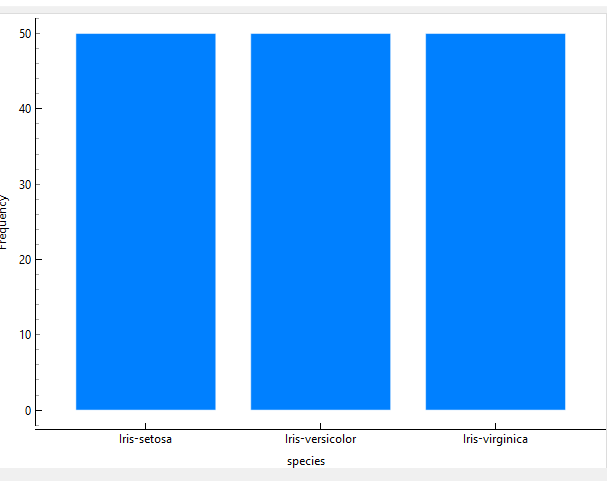

In [42]:
kelas_count = {}

for s in species:
    if s not in kelas_count:
        kelas_count[s] = 1
    else:
        kelas_count[s] += 1

print("Distribusi Kelas:")
for k in kelas_count:
    print(k, ":", kelas_count[k])

Distribusi Kelas:
Iris-setosa : 50
Iris-versicolor : 50
Iris-virginica : 50


### sepal_length

Screenshoot Dari Orange


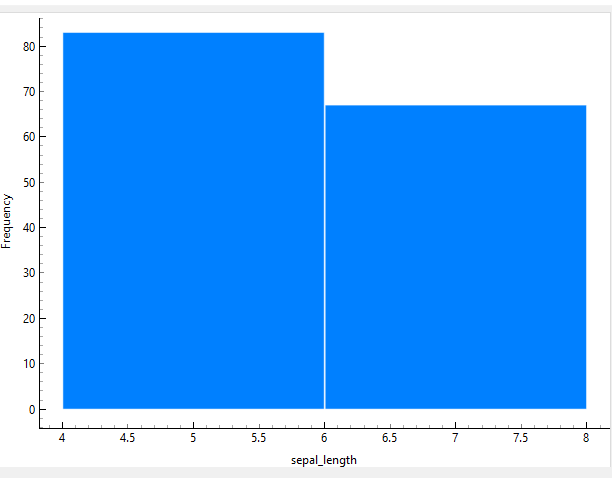

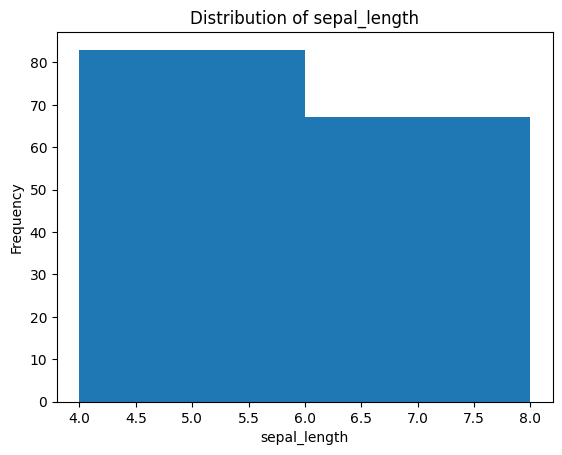

In [43]:
import numpy as np
import matplotlib.pyplot as plt

data = sepal_length

min_val = np.floor(min(data))
max_val = np.ceil(max(data))

bins = np.arange(min_val, max_val + 2, 2)

plt.figure()
plt.hist(data, bins=bins)
plt.xlabel("sepal_length")
plt.ylabel("Frequency")
plt.title("Distribution of sepal_length")
plt.show()

### sepal_width
Screenshoot Dari Orange

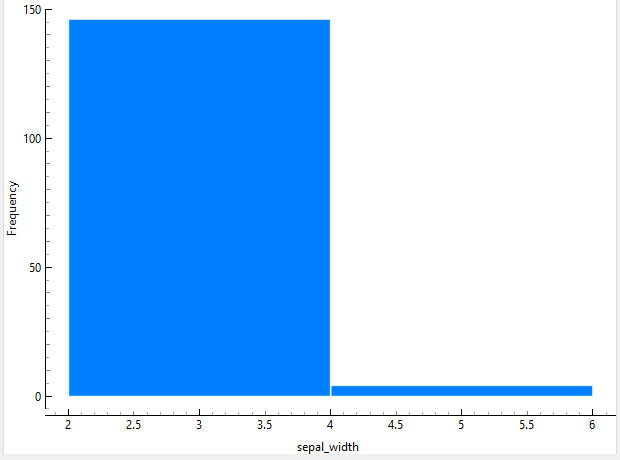

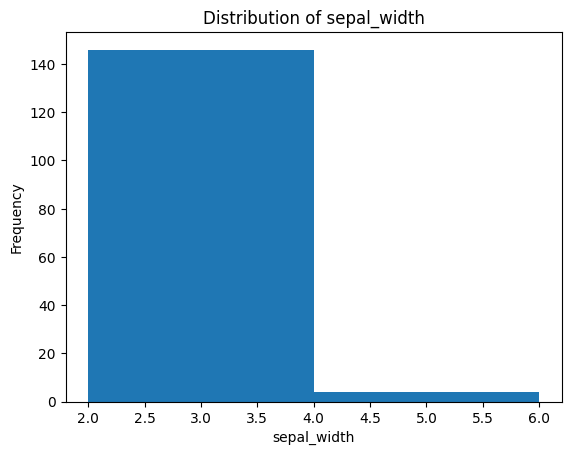

In [44]:
data = sepal_width

min_val = int(min(data))
max_val = int(max(data)) + 1

bins = range(min_val, max_val + 2, 2)

plt.figure()
plt.hist(data, bins=bins)
plt.xlabel("sepal_width")
plt.ylabel("Frequency")
plt.title("Distribution of sepal_width")
plt.show()

### petal_length
Screenshoot Dari Orange

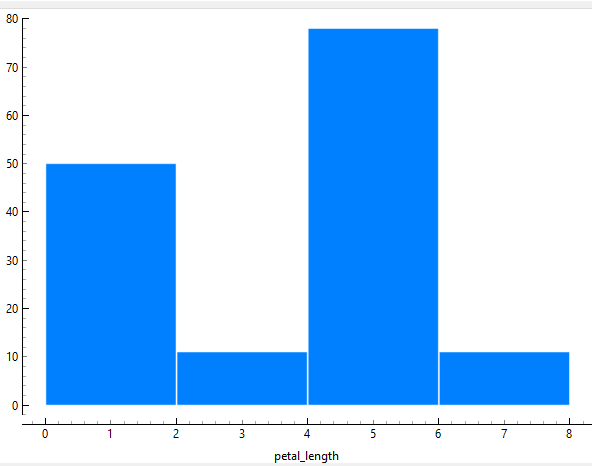

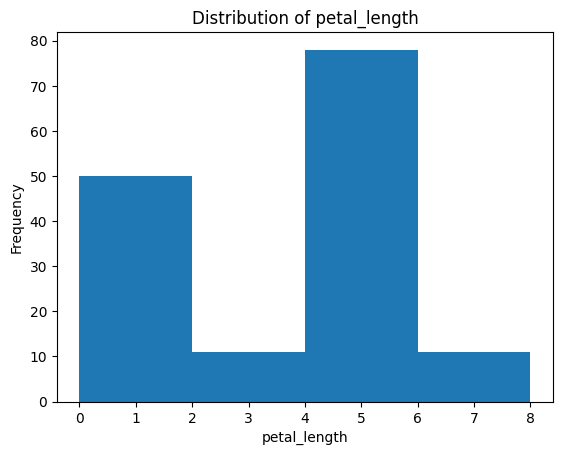

In [45]:
data = petal_length

bins = np.arange(0, 8 + 2, 2)

plt.figure()
plt.hist(data, bins=bins)
plt.xlabel("petal_length")
plt.ylabel("Frequency")
plt.title("Distribution of petal_length")
plt.show()

### petal_width
Screenshoot Dari Orange

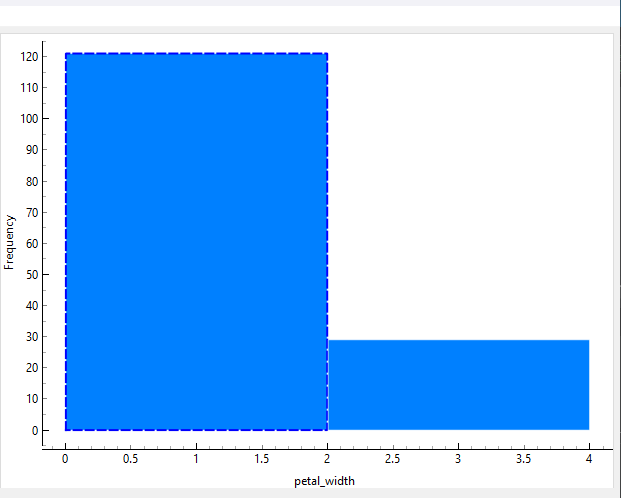

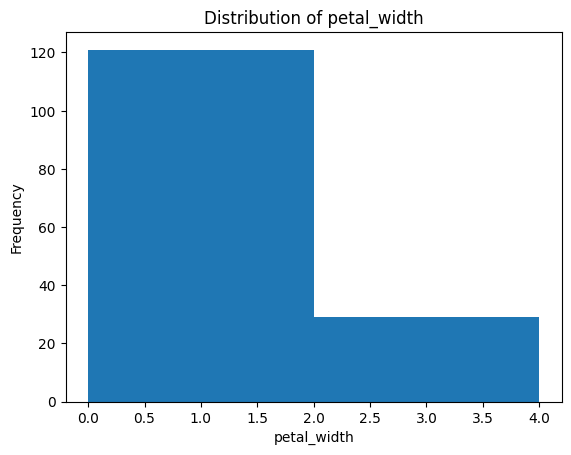

In [46]:
data = petal_width

min_val = np.floor(min(data))
max_val = np.ceil(max(data))

bins = np.arange(min_val, max_val + 2, 2)

plt.figure()
plt.hist(data, bins=bins)
plt.xlabel("petal_width")
plt.ylabel("Frequency")
plt.title("Distribution of petal_width")
plt.show()

## Column Statistics


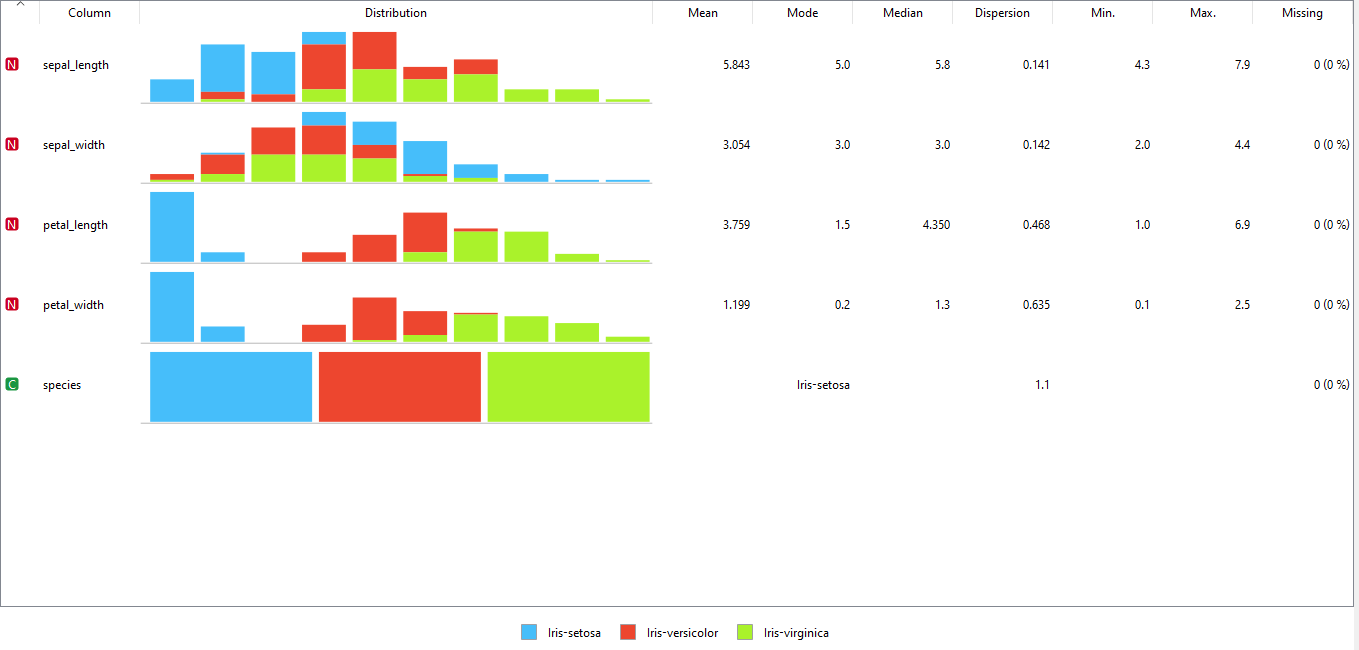

In [47]:
def statistik(data, nama):

    clean_data = []
    missing = 0

    for x in data:
        if x == "" or x is None:
            missing += 1
        else:
            clean_data.append(float(x))

    n = len(clean_data)

    # Mean
    mean = sum(clean_data) / n

    sorted_data = sorted(clean_data)

    # Median
    if n % 2 == 0:
        median = (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2
    else:
        median = sorted_data[n//2]

    # Mode
    freq = {}
    for x in clean_data:
        if x not in freq:
            freq[x] = 1
        else:
            freq[x] += 1

    max_freq = max(freq.values())
    mode_value = None

    for key in sorted(freq):
        if freq[key] == max_freq:
            mode_value = key
            break

    # Variance
    total = 0
    for x in clean_data:
        total += (x - mean) ** 2

    variance = total / (n - 1)
    std_dev = variance ** 0.5

    # Dispersion
    dispersion = std_dev / mean

    print("===== Statistik", nama, "=====")
    print("Mean         :", round(mean,3))
    print("Mode         :", round(mode_value,3))
    print("Median       :", round(median,3))
    print("Dispersion   :", round(dispersion,3))
    print("Min          :", round(min(clean_data),3))
    print("Max          :", round(max(clean_data),3))
    print("Missing      :", missing)
    print("Count        :", n)
    print()

In [48]:
statistik(sepal_length, "Sepal Length")
statistik(sepal_width, "Sepal Width")

===== Statistik Sepal Length =====
Mean         : 5.843
Mode         : 5.0
Median       : 5.8
Dispersion   : 0.142
Min          : 4.3
Max          : 7.9
Missing      : 0
Count        : 150

===== Statistik Sepal Width =====
Mean         : 3.054
Mode         : 3.0
Median       : 3.0
Dispersion   : 0.142
Min          : 2.0
Max          : 4.4
Missing      : 0
Count        : 150



In [49]:
statistik(petal_length, "Petal Length")
statistik(petal_width, "Petal Width")

===== Statistik Petal Length =====
Mean         : 3.759
Mode         : 1.5
Median       : 4.35
Dispersion   : 0.469
Min          : 1.0
Max          : 6.9
Missing      : 0
Count        : 150

===== Statistik Petal Width =====
Mean         : 1.199
Mode         : 0.2
Median       : 1.3
Dispersion   : 0.637
Min          : 0.1
Max          : 2.5
Missing      : 0
Count        : 150



## Box Plot

In [50]:
def statistik_per_kelas(data, species, target):
    data_kelas = []

    for i in range(len(species)):
        if species[i] == target:
            data_kelas.append(data[i])

    mean = sum(data_kelas)/len(data_kelas)
    print("Mean", target, ":", round(mean,3))

### petal_length

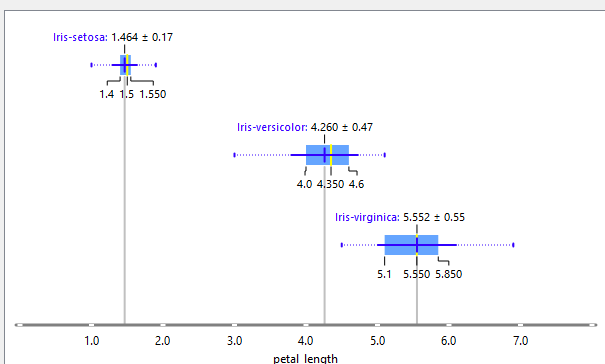

In [51]:
print("Petal Length per Kelas")
for k in kelas_count:
    statistik_per_kelas(petal_length, species, k)

Petal Length per Kelas
Mean Iris-setosa : 1.464
Mean Iris-versicolor : 4.26
Mean Iris-virginica : 5.552


### petal_width

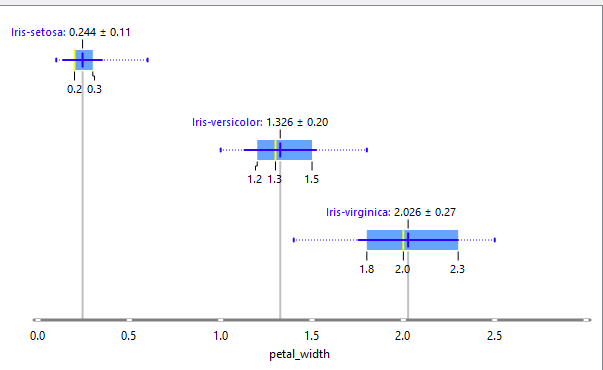

In [52]:
print("Petal width per Kelas")
for k in kelas_count:
    statistik_per_kelas(petal_width, species, k)

Petal width per Kelas
Mean Iris-setosa : 0.244
Mean Iris-versicolor : 1.326
Mean Iris-virginica : 2.026


### sepal_length

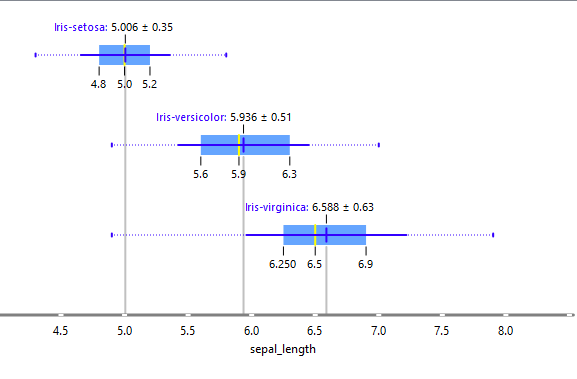

In [53]:
print("sepal length per Kelas")
for k in kelas_count:
    statistik_per_kelas(sepal_length, species, k)

sepal length per Kelas
Mean Iris-setosa : 5.006
Mean Iris-versicolor : 5.936
Mean Iris-virginica : 6.588


### sepal_width

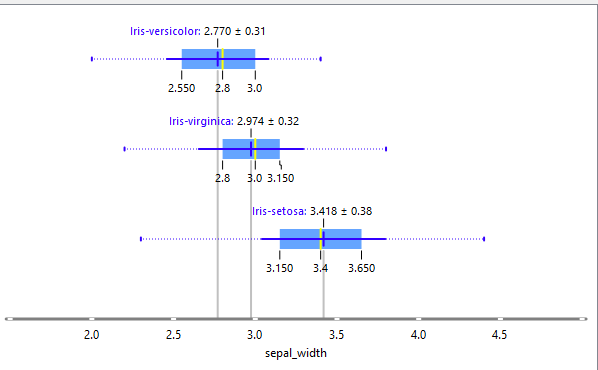

In [54]:
print("Sepal width per Kelas")
for k in kelas_count:
    statistik_per_kelas(sepal_width, species, k)

Sepal width per Kelas
Mean Iris-setosa : 3.418
Mean Iris-versicolor : 2.77
Mean Iris-virginica : 2.974


## Scatter Plot


### petal_length VS petal_width

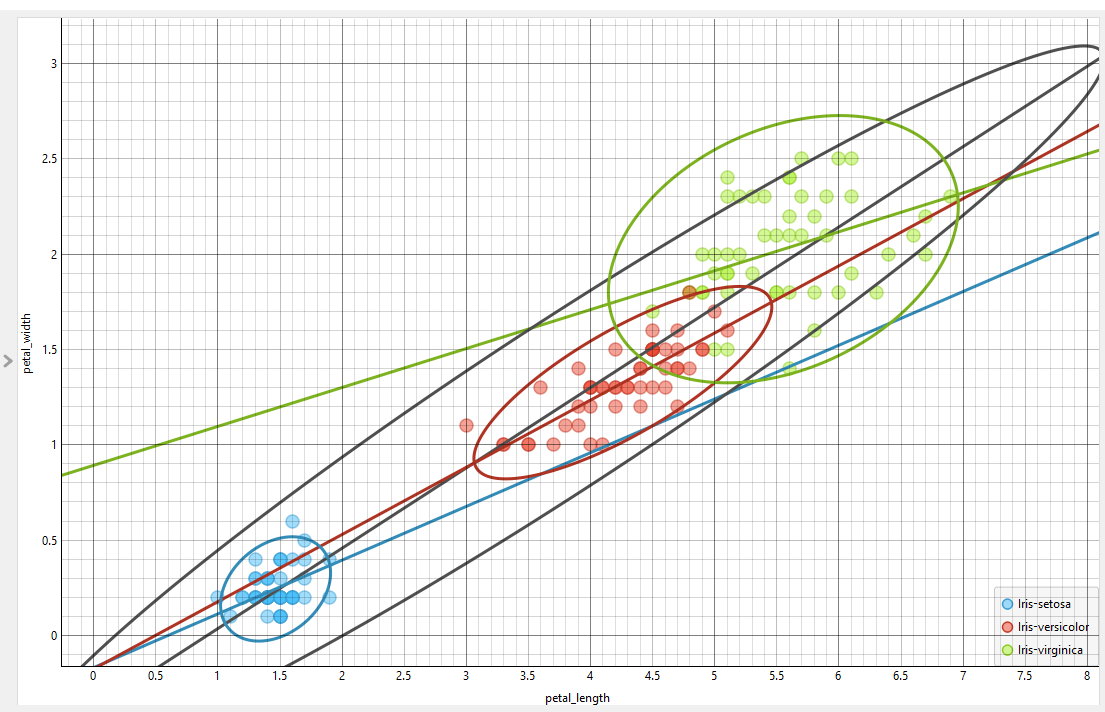

## Correlations

In [55]:
def korelasi(x, y):
    mean_x = sum(x)/len(x)
    mean_y = sum(y)/len(y)

    num = 0
    den_x = 0
    den_y = 0

    for i in range(len(x)):
        dx = x[i] - mean_x
        dy = y[i] - mean_y
        num += dx * dy
        den_x += dx**2
        den_y += dy**2

    return num / ((den_x * den_y) ** 0.5)

### petal_length vs petal_width
### petal_length vs sepal_length
### petal_length vs sepal_width

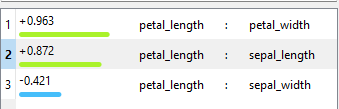

In [56]:
print("Korelasi Petal Length vs Petal Width:",
      round(korelasi(petal_length, petal_width),3))
print("Korelasi Petal Length vs Sepal Length:",
      round(korelasi(petal_length, sepal_length),3))
print("Korelasi petal Length vs Sepal Width:",
      round(korelasi(petal_length, sepal_width),3))

Korelasi Petal Length vs Petal Width: 0.963
Korelasi Petal Length vs Sepal Length: 0.872
Korelasi petal Length vs Sepal Width: -0.421
